Perfrom EDA on superstore.csv dataset


In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pathlib import Path
from scipy.stats import kurtosis, skew



In [17]:
base_dir = Path().resolve().parent  
df = pd.read_csv(base_dir / "data/processed/superstore_cleaned.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [21]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# Drop ID-related columns
id_columns = ['Row ID', 'Order ID', 'Customer ID', 'Product ID']
df_cleaned = df.drop(columns=id_columns)


In [32]:
numeric_cols = df_cleaned.select_dtypes(include=np.number)
summary_stats = pd.DataFrame({
    'Mean': numeric_cols.mean(),
    'Median': numeric_cols.median(),
    'Mode': numeric_cols.mode().iloc[0],
    'Min': numeric_cols.min(),
    'Max': numeric_cols.max(),
    'Range': numeric_cols.max() - numeric_cols.min(),
    'Std Dev': numeric_cols.std(),
    'Variance': numeric_cols.var(),
    'Skewness': numeric_cols.apply(skew),
    'Kurtosis': numeric_cols.apply(kurtosis)
})

print(summary_stats.round(2))


                 Mean    Median      Mode      Min       Max     Range  \
Postal Code  55190.38  56430.50  10035.00  1040.00  99301.00  98261.00   
Sales          229.86     54.49     12.96     0.44  22638.48  22638.04   
Quantity         3.79      3.00      3.00     1.00     14.00     13.00   
Discount         0.16      0.20      0.00     0.00      0.80      0.80   
Profit          28.66      8.67      0.00 -6599.98   8399.98  14999.95   

              Std Dev      Variance  Skewness  Kurtosis  
Postal Code  32063.69  1.028080e+09     -0.13     -1.49  
Sales          623.25  3.884345e+05     12.97    305.16  
Quantity         2.23  4.950000e+00      1.28      1.99  
Discount         0.21  4.000000e-02      1.68      2.41  
Profit         234.26  5.487780e+04      7.56    396.99  


In [30]:
# 📌 2. Sales & Profit Analysis

# Total Sales, Profit, Quantity
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_quantity = df['Quantity'].sum()

print(f"🔹 Total Sales: ${total_sales:,.2f}")
print(f"🔹 Total Profit: ${total_profit:,.2f}")
print(f"🔹 Total Quantity Sold: {total_quantity}")

# Average Order Value
avg_order_value = df['Sales'].mean()
print(f"\n🔸 Average Order Value (mean Sales): ${avg_order_value:.2f}")

# Average Discount
avg_discount = df['Discount'].mean()
print(f"🔸 Average Discount: {avg_discount:.2%}")

# Profit per Product
profit_per_product = df.groupby('Product Name')['Profit'].mean().sort_values(ascending=False)
print("\n🔸 Top 5 Products by Average Profit:")
print(profit_per_product.head(5).round(2))

# Profit Margin (Profit / Sales)
df['Profit Margin'] = df['Profit'] / df['Sales']
avg_profit_margin = df['Profit Margin'].mean()
print(f"\n🔸 Average Profit Margin: {avg_profit_margin:.2%}")

# Count of Profitable vs Loss-making Orders
profitable_orders = (df['Profit'] > 0).sum()
loss_orders = (df['Profit'] < 0).sum()
total_orders = len(df)

print(f"\n🔹 Profitable Orders: {profitable_orders} ({profitable_orders / total_orders:.2%})")
print(f"🔹 Loss-making Orders: {loss_orders} ({loss_orders / total_orders:.2%})")


🔹 Total Sales: $2,297,200.86
🔹 Total Profit: $286,397.02
🔹 Total Quantity Sold: 37873

🔸 Average Order Value (mean Sales): $229.86
🔸 Average Discount: 15.62%

🔸 Top 5 Products by Average Profit:
Product Name
Canon imageCLASS 2200 Advanced Copier                                    5039.99
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier    1995.99
Ativa V4110MDD Micro-Cut Shredder                                        1886.47
3D Systems Cube Printer, 2nd Generation, Magenta                         1858.99
Zebra ZM400 Thermal Label Printer                                        1671.77
Name: Profit, dtype: float64

🔸 Average Profit Margin: 12.03%

🔹 Profitable Orders: 8058 (80.63%)
🔹 Loss-making Orders: 1871 (18.72%)


In [31]:
# 📌 3. Category-Level Stats

# Group by Category & Sub-Category: Total & Average Sales, Total Profit, Avg Discount
category_stats = df.groupby(['Category', 'Sub-Category']).agg({
    'Sales': ['sum', 'mean'],
    'Profit': 'sum',
    'Discount': 'mean'
}).round(2)

# Clean column names
category_stats.columns = ['Total Sales', 'Avg Sales', 'Total Profit', 'Avg Discount']
print("🔹 Category & Sub-Category Stats:\n")
print(category_stats)

# Most & Least Profitable Categories
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print("\n🔸 Most Profitable Category:", category_profit.idxmax(), f"(${category_profit.max():,.2f})")
print("🔸 Least Profitable Category:", category_profit.idxmin(), f"(${category_profit.min():,.2f})")

# Top-selling Products by Total Sales
top_selling = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
print("\n🔹 Top 5 Selling Products:")
print(top_selling.head(5).round(2))

# Profit Margin per Product
df['Profit Margin'] = df['Profit'] / df['Sales']
profit_margin_by_product = df.groupby('Product Name')['Profit Margin'].mean().sort_values(ascending=False)

print("\n🔹 Top 5 Products by Profit Margin:")
print(profit_margin_by_product.head(5).round(2))

print("\n🔹 Bottom 5 Products by Profit Margin:")
print(profit_margin_by_product.tail(5).round(2))


🔹 Category & Sub-Category Stats:

                              Total Sales  Avg Sales  Total Profit  \
Category        Sub-Category                                         
Furniture       Bookcases       114880.00     503.86      -3472.56   
                Chairs          328449.10     532.33      26590.17   
                Furnishings      91705.16      95.83      13059.14   
                Tables          206965.53     648.79     -17725.48   
Office Supplies Appliances      107532.16     230.76      18138.01   
                Art              27118.79      34.07       6527.79   
                Binders         203412.73     133.56      30221.76   
                Envelopes        16476.40      64.87       6964.18   
                Fasteners         3024.28      13.94        949.52   
                Labels           12486.31      34.30       5546.25   
                Paper            78479.21      57.28      34053.57   
                Storage         223843.61     264.59    

In [33]:
# 📌 4. Customer Analysis

# Group by Customer ID & Customer Name
customer_group = df.groupby(['Customer ID', 'Customer Name']).agg({
    'Order ID': 'nunique',      # Number of unique orders
    'Sales': 'sum',
    'Profit': 'sum'
}).rename(columns={
    'Order ID': 'Total Orders',
    'Sales': 'Total Sales',
    'Profit': 'Total Profit'
}).sort_values(by='Total Orders', ascending=False)

# 🔹 Most Loyal Customers (by number of orders)
print("🔹 Top 5 Most Loyal Customers (most orders):")
print(customer_group.head(5).round(2))

# 🔸 Customers with Highest Total Sales
top_sales_customers = customer_group.sort_values(by='Total Sales', ascending=False)
print("\n🔸 Top 5 Customers by Total Sales:")
print(top_sales_customers.head(5).round(2))

# 🔻 Customers Contributing to Loss
loss_customers = customer_group[customer_group['Total Profit'] < 0].sort_values(by='Total Profit')
print("\n🔻 Customers Contributing to Loss:")
print(loss_customers.head(5).round(2))


🔹 Top 5 Most Loyal Customers (most orders):
                              Total Orders  Total Sales  Total Profit
Customer ID Customer Name                                            
EP-13915    Emily Phan                  17      5478.06        144.96
SH-19975    Sally Hughsby               13      3406.84        558.47
NS-18640    Noel Staavos                13      2964.82       -234.77
PG-18820    Patrick Gardner             13      3086.91        137.46
ZC-21910    Zuschuss Carroll            13      8025.71      -1032.15

🔸 Top 5 Customers by Total Sales:
                           Total Orders  Total Sales  Total Profit
Customer ID Customer Name                                         
SM-20320    Sean Miller               5     25043.05      -1980.74
TC-20980    Tamara Chand              5     19052.22       8981.32
RB-19360    Raymond Buch              6     15117.34       6976.10
TA-21385    Tom Ashbrook              4     14595.62       4703.79
AB-10105    Adrian Barton    

In [43]:
# 📌 5. Segment & Region Analysis

# ---------------------------
# 🔹 1. Segment-wise Sales, Profit, Quantity
segment_stats = df.groupby('Segment').agg({
    'Quantity': 'sum',
    'Sales': 'mean',   # avg sales per order
    'Profit': 'mean'   # avg profit per order
}).rename(columns={
    'Sales': 'Avg Sales per Order',
    'Profit': 'Avg Profit per Order'
})
print("🔹 Segment-wise Average Sales & Profit:")
print(segment_stats.round(2))


# ---------------------------
# 🔹 2. Region, State, City Analysis: Sales, Profit, Quantity
region_stats = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values(by='Sales', ascending=False)

print("\n🔹 Sales, Profit, Quantity by Region:")
print(region_stats.round(2))

# ---------------------------
# 🔹 3. Most Profitable Region
most_profitable_region = region_stats['Profit'].idxmax()
profit_value = region_stats['Profit'].max()
print(f"\n✅ Most Profitable Region: {most_profitable_region} (${profit_value:,.2f})")


# ---------------------------
# 🔹 4. Most Profitable State
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
most_profitable_state = state_profit.idxmax()
state_profit_value = state_profit.max()

print(f"✅ Most Profitable State: {most_profitable_state} (${state_profit_value:,.2f})")

# Optional: Least Profitable State
least_profitable_state = state_profit.idxmin()
least_profit_value = state_profit.min()
print(f"❌ Least Profitable State: {least_profitable_state} (${least_profit_value:,.2f})")


🔹 Segment-wise Average Sales & Profit:
             Quantity  Avg Sales per Order  Avg Profit per Order
Segment                                                         
Consumer        19521               223.73                 25.84
Corporate       11608               233.82                 30.46
Home Office      6744               240.97                 33.82

🔹 Sales, Profit, Quantity by Region:
             Sales     Profit  Quantity
Region                                 
West     725457.82  108418.45     12266
East     678781.24   91522.78     10618
Central  501239.89   39706.36      8780
South    391721.90   46749.43      6209

✅ Most Profitable Region: West ($108,418.45)
✅ Most Profitable State: California ($76,381.39)
❌ Least Profitable State: Texas ($-25,729.36)


In [44]:

# 📌 6. Time Series Analysis

# Make sure dates are in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create time-based columns
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.to_period('M')
df['Quarter'] = df['Order Date'].dt.to_period('Q')

# ---------------------------
# 🔹 1. Monthly Sales & Profit Trend
monthly = df.groupby('Month')[['Sales', 'Profit']].sum()
print("🔹 Monthly Sales & Profit:\n")
print(monthly.tail())  # last few months

# ---------------------------
# 🔹 2. Quarterly Sales & Profit Trend
quarterly = df.groupby('Quarter')[['Sales', 'Profit']].sum()
print("\n🔹 Quarterly Sales & Profit:\n")
print(quarterly.tail())

# ---------------------------
# 🔹 3. Yearly Sales & Profit Trend
yearly = df.groupby('Year')[['Sales', 'Profit']].sum()
print("\n🔹 Yearly Sales & Profit:\n")
print(yearly)

# ---------------------------
# 🔹 4. Month-over-Month Sales Growth (%)
monthly['MoM Growth (%)'] = monthly['Sales'].pct_change() * 100
print("\n🔹 Month-over-Month Growth:")
print(monthly[['Sales', 'MoM Growth (%)']].round(2).tail())

# ---------------------------
# 🔹 5. Seasonal Spikes (e.g., end of year)
# Group by month name across all years to spot seasonal trends
df['Month_Name'] = df['Order Date'].dt.strftime('%B')
seasonal = df.groupby('Month_Name')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print("\n🔹 Seasonal Sales by Month:")
print(seasonal)

# ---------------------------
# 🔹 6. Average Order Delivery Time
df['Delivery Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days
avg_delivery_time = df['Delivery Time (Days)'].mean()
print(f"\n✅ Average Delivery Time: {avg_delivery_time:.2f} days")


🔹 Monthly Sales & Profit:

               Sales      Profit
Month                           
2017-08   63120.8880   9040.9557
2017-09   87866.6520  10991.5556
2017-10   77776.9232   9275.2755
2017-11  118447.8250   9690.1037
2017-12   83829.3188   8483.3468

🔹 Quarterly Sales & Profit:

               Sales      Profit
Quarter                         
2016Q4   236098.7538  38139.8593
2017Q1   123144.8602  23506.2026
2017Q2   133764.3720  15499.2085
2017Q3   196251.9560  26985.1325
2017Q4   280054.0670  27448.7260

🔹 Yearly Sales & Profit:

            Sales      Profit
Year                         
2014  484247.4981  49543.9741
2015  470532.5090  61618.6037
2016  609205.5980  81795.1743
2017  733215.2552  93439.2696

🔹 Month-over-Month Growth:
             Sales  MoM Growth (%)
Month                             
2017-08   63120.89           39.45
2017-09   87866.65           39.20
2017-10   77776.92          -11.48
2017-11  118447.82           52.29
2017-12   83829.32          -29.23



In [45]:
# 📌 7. Shipping Mode Analysis

# Ensure date columns are datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Add Delivery Time column if not already done
df['Delivery Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

# ---------------------------
# 🔹 1. Count of Orders by Ship Mode
order_counts = df['Ship Mode'].value_counts()
print("🔹 Count of Orders by Ship Mode:")
print(order_counts)

# ---------------------------
# 🔹 2. Average Delivery Time per Shipping Mode
avg_delivery_by_mode = df.groupby('Ship Mode')['Delivery Time (Days)'].mean()
print("\n🔹 Average Delivery Time per Ship Mode:")
print(avg_delivery_by_mode.round(2))

# ---------------------------
# 🔹 3. Profitability Comparison by Ship Mode
ship_mode_profit = df.groupby('Ship Mode').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).round(2)

print("\n🔹 Profitability by Ship Mode:")
print(ship_mode_profit)


🔹 Count of Orders by Ship Mode:
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

🔹 Average Delivery Time per Ship Mode:
Ship Mode
First Class       2.18
Same Day          0.04
Second Class      3.24
Standard Class    5.01
Name: Delivery Time (Days), dtype: float64

🔹 Profitability by Ship Mode:
                     Sales     Profit  Discount
Ship Mode                                      
First Class      351428.42   48969.84      0.16
Same Day         128363.12   15891.76      0.15
Second Class     459193.57   57446.64      0.14
Standard Class  1358215.74  164088.79      0.16


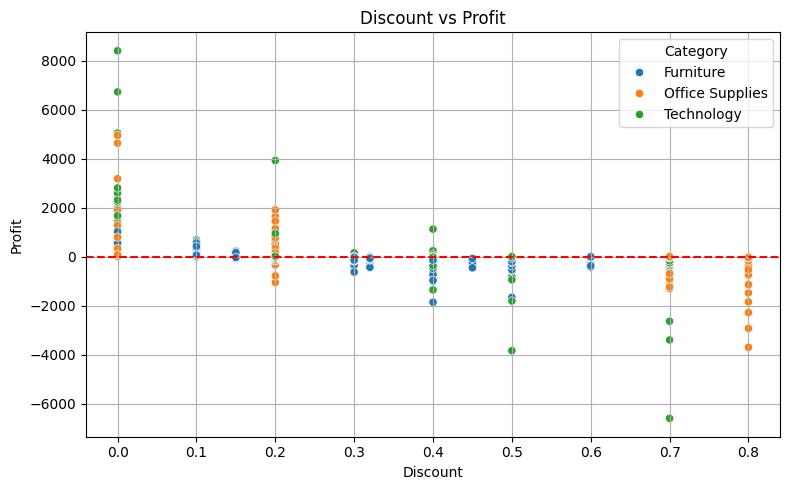

/tmp/ipykernel_34396/589537435.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_profit = df.groupby('Discount Bin')['Profit'].mean()



🔹 Average Profit by Discount Range:
Discount Bin
(0.0, 0.1]     96.06
(0.1, 0.2]     24.74
(0.2, 0.3]    -45.68
(0.3, 0.4]   -109.22
(0.4, 0.5]   -298.70
(0.5, 0.6]    -43.08
(0.6, 0.7]    -95.87
(0.7, 0.8]   -101.80
(0.8, 0.9]       NaN
(0.9, 1.0]       NaN
Name: Profit, dtype: float64


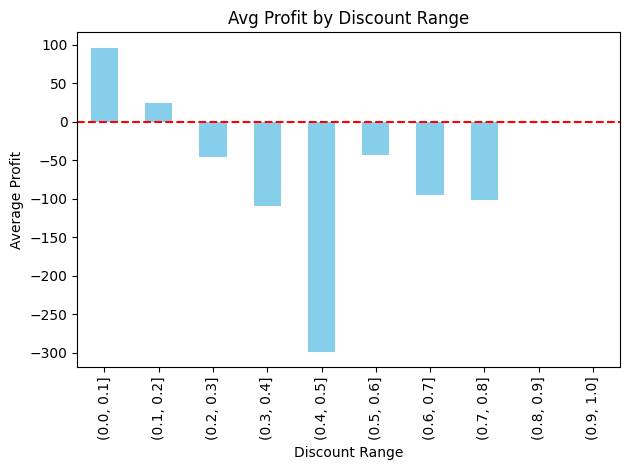

/tmp/ipykernel_34396/589537435.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_sales = df.groupby('Discount Bin')['Sales'].mean()



🔹 Average Sales by Discount Range:
Discount Bin
(0.0, 0.1]    578.40
(0.1, 0.2]    213.58
(0.2, 0.3]    454.74
(0.3, 0.4]    561.85
(0.4, 0.5]    836.41
(0.5, 0.6]     48.15
(0.6, 0.7]     97.18
(0.7, 0.8]     56.55
(0.8, 0.9]       NaN
(0.9, 1.0]       NaN
Name: Sales, dtype: float64


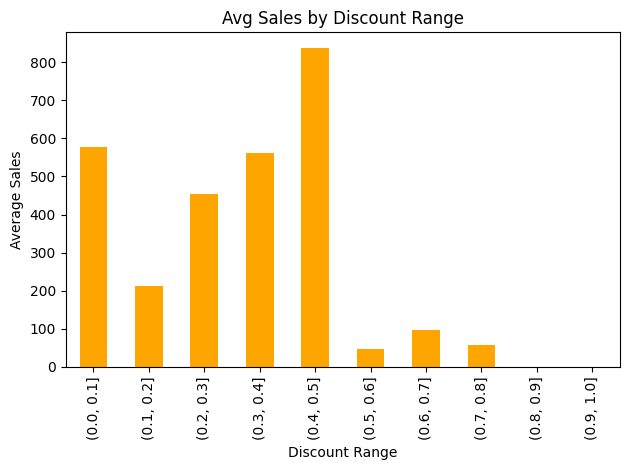

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure relevant columns are numeric
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# ---------------------------
# 🔹 1. Relationship between Discount and Profit
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Discount vs Profit")
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------
# 🔹 2. Discount Range vs Average Profit
# Create discount bins
df['Discount Bin'] = pd.cut(df['Discount'], bins=np.arange(0, 1.1, 0.1))  # 0.0–1.0 in steps of 0.1

discount_profit = df.groupby('Discount Bin')['Profit'].mean()
print("\n🔹 Average Profit by Discount Range:")
print(discount_profit.round(2))

# Optional: Barplot of profit by discount bin
discount_profit.plot(kind='bar', color='skyblue', title="Avg Profit by Discount Range", ylabel="Average Profit", xlabel="Discount Range")
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

# ---------------------------
# 🔹 3. Are higher discounts improving sales?
discount_sales = df.groupby('Discount Bin')['Sales'].mean()
print("\n🔹 Average Sales by Discount Range:")
print(discount_sales.round(2))

# Optional: Barplot of sales vs discount
discount_sales.plot(kind='bar', color='orange', title="Avg Sales by Discount Range", ylabel="Average Sales", xlabel="Discount Range")
plt.tight_layout()
plt.show()


🔹 Correlation Matrix:
          Sales  Profit  Discount  Quantity
Sales      1.00    0.48     -0.03      0.20
Profit     0.48    1.00     -0.22      0.07
Discount  -0.03   -0.22      1.00      0.01
Quantity   0.20    0.07      0.01      1.00


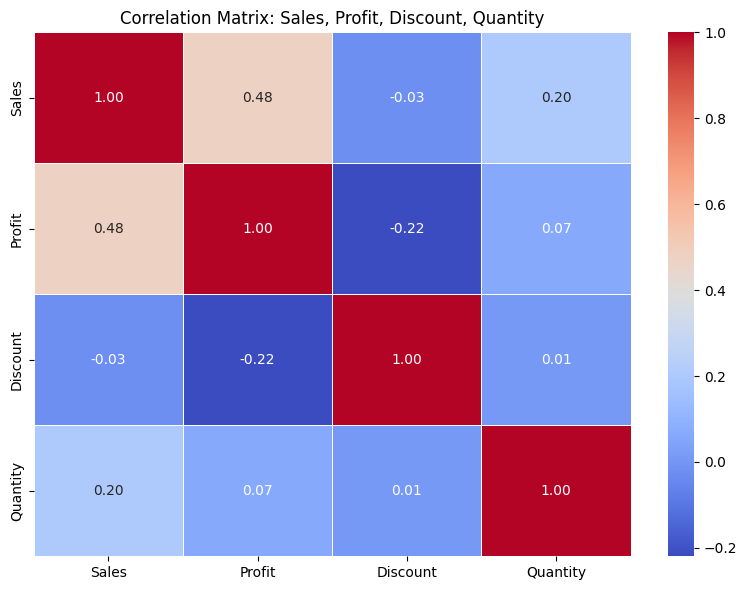

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = ['Sales', 'Profit', 'Discount', 'Quantity']

# Correlation matrix
corr_matrix = df[numeric_cols].corr()

print("🔹 Correlation Matrix:")
print(corr_matrix.round(2))

# ---------------------------
# 🔸 Heatmap Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix: Sales, Profit, Discount, Quantity")
plt.tight_layout()
plt.show()


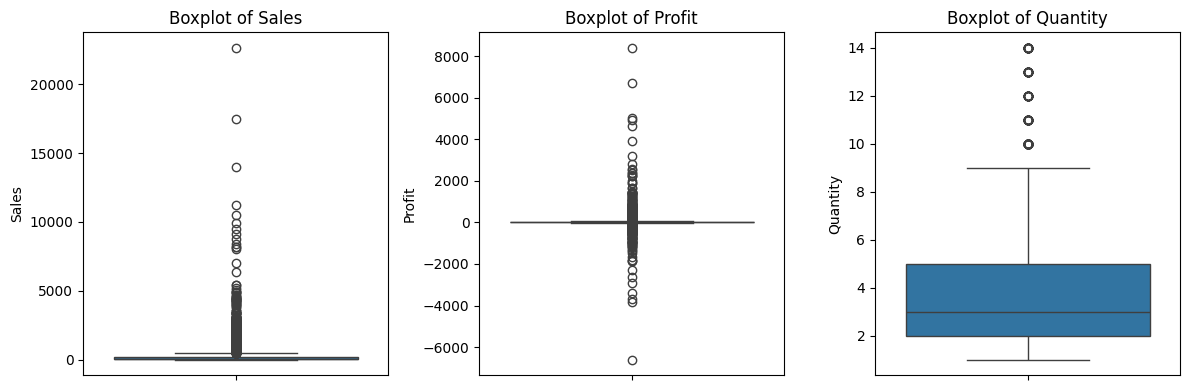

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numeric features
features = ['Sales', 'Profit', 'Quantity']

plt.figure(figsize=(12, 4))
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [49]:
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores
z_scores = np.abs(zscore(df[features]))

# Set threshold
threshold = 3
outliers_z = (z_scores > threshold)

# Count outliers per column
print("\n🔹 Z-score Method: Outlier Counts")
for i, col in enumerate(features):
    print(f"{col}: {outliers_z[:, i].sum()} outliers")



🔹 Z-score Method: Outlier Counts
Sales: 127 outliers
Profit: 107 outliers
Quantity: 113 outliers


In [50]:
# IQR method
print("\n🔹 IQR Method: Outlier Counts")
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")



🔹 IQR Method: Outlier Counts
Sales: 1167 outliers
Profit: 1881 outliers
Quantity: 170 outliers


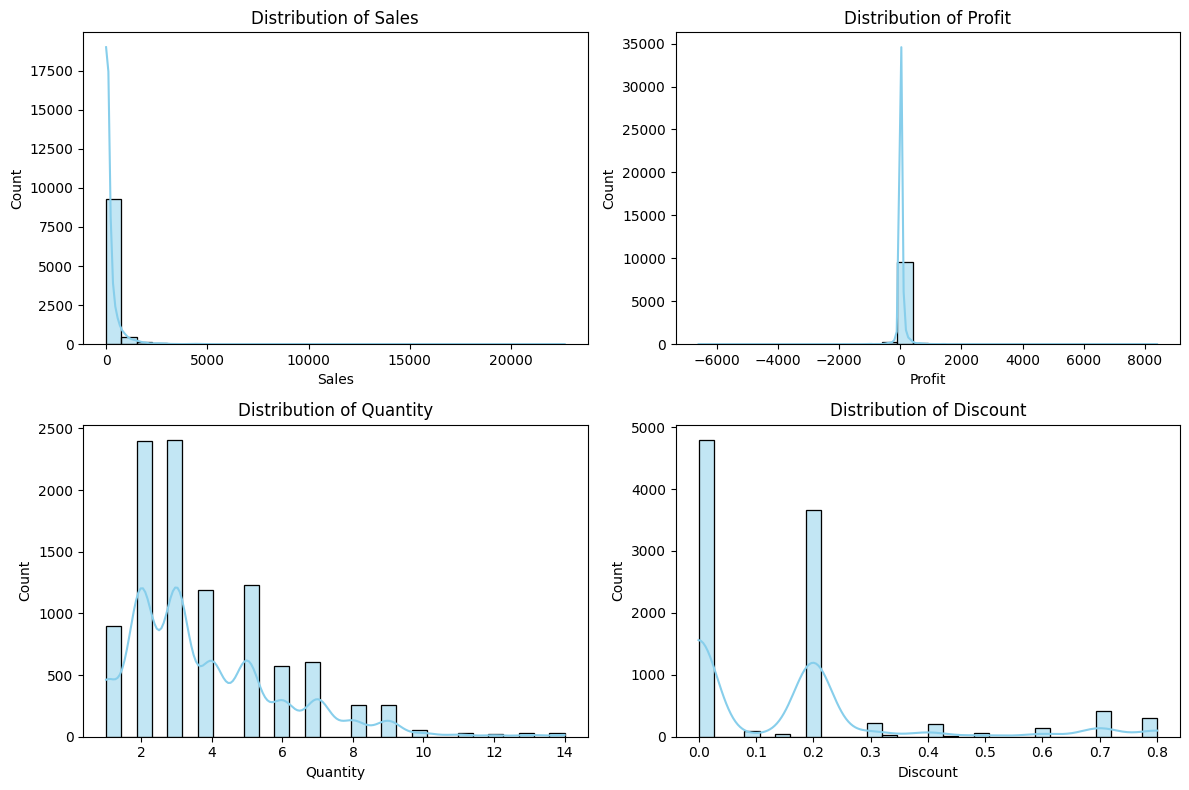

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target features
features = ['Sales', 'Profit', 'Quantity', 'Discount']

plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [53]:
print("🔹 Skewness of Variables:\n")
for col in features:
    skew_value = df[col].skew()
    print(f"{col}: {skew_value:.2f}")


🔹 Skewness of Variables:

Sales: 12.97
Profit: 7.56
Quantity: 1.28
Discount: 1.68


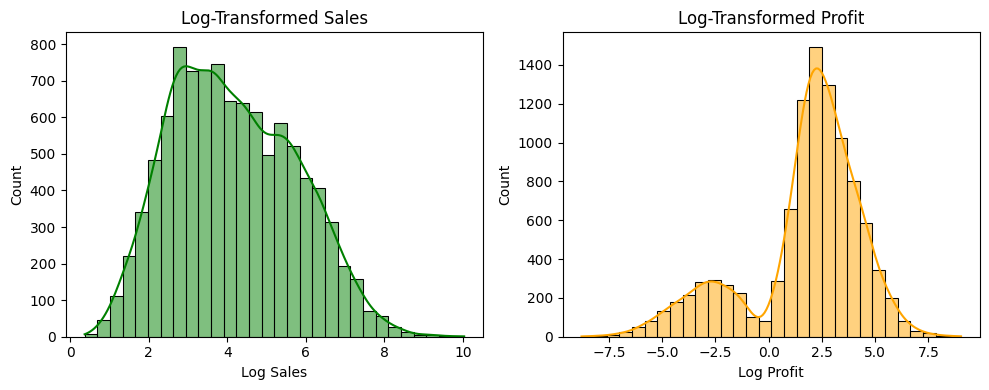

In [54]:
import numpy as np

# Add log-transformed columns (add 1 to avoid log(0))
df['Log Sales'] = np.log1p(df['Sales'])
df['Log Profit'] = np.log1p(np.abs(df['Profit'])) * np.sign(df['Profit'])  # keeps negative profit direction

# Plot log-transformed histograms
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Log Sales'], kde=True, bins=30, color='green')
plt.title('Log-Transformed Sales')

plt.subplot(1, 2, 2)
sns.histplot(df['Log Profit'], kde=True, bins=30, color='orange')
plt.title('Log-Transformed Profit')

plt.tight_layout()
plt.show()
